## Observations and Insights 

In [ ]:
#Observations
#1 - Mice treated with Ketapril had the higest variance in tumor volume and the greatest standard deviation value.
#2 - Capomulin and Ramicane were the drug regimens used the most on the mice tested, and mice given these two drug regimens reported the
#    lowest average tumor volume.
#3 - Mice treated with Capomulin showed a clear positive correlation between weight and tumor volume.

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [78]:
# Checking the number of mice.
unique_mice = len((combined_df["Mouse ID"]).unique())
unique_mice

249

In [79]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique

print(duplicate_id)

<bound method Series.unique of 909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object>


In [80]:
# Optional: Get all the data for the duplicate mouse ID. 
# Note: this won't work once I run subsequent cells since I drop the dup mouse from the combined_df
dup_mouse = combined_df.loc[(combined_df["Mouse ID"] == "g989"),:]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
clean_df = combined_df.copy()
indexNames = clean_df[clean_df["Mouse ID"] == "g989"].index
clean_df.drop(indexNames, inplace = True)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [82]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean = len((clean_df["Mouse ID"]).unique())
unique_mice_clean

248

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
# https://www.datasciencemadesimple.com/variance-function-python-pandas-dataframe-row-column-wise-variance/
# https://www.datasciencemadesimple.com/standard-deviation-function-python-pandas-row-column/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html

drug_reg_group = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

#format tip: https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns
pd.options.display.float_format = '{:.2f}'.format
tumor_vol_df = pd.DataFrame({"Tumor Volume Mean": drug_reg_group.mean(),
                            "Tumor Volume Median": drug_reg_group.median(),
                            "Tumor Volume Variance": drug_reg_group.var(),
                            "Tumor Volume Std Dev": drug_reg_group.std(),
                            "Tumor Volume SEM": drug_reg_group.sem()
                            })
tumor_vol_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
regimen_agg = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
regimen_agg

Tumor Volume (mm3)                       
                           mean median   var  std  sem
Drug Regimen                                          
Capomulin                 40.68  41.56 24.95 4.99 0.33
Ceftamin                  52.59  51.78 39.29 6.27 0.47
Infubinol                 52.88  51.82 43.13 6.57 0.49
Ketapril                  55.24  53.70 68.55 8.28 0.60
Naftisol                  54.33  52.51 66.17 8.13 0.60
Placebo                   54.03  52.29 61.17 7.82 0.58
Propriva                  52.32  50.45 43.85 6.62 0.54
Ramicane                  40.22  40.67 23.49 4.85 0.32
Stelasyn                  54.23  52.43 59.45 7.71 0.57
Zoniferol                 53.24  51.82 48.53 6.97 0.52

## Bar and Pie Charts

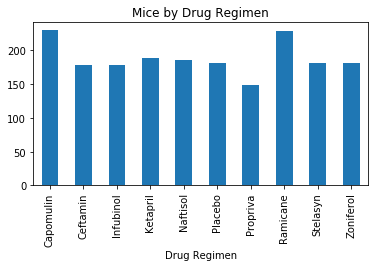

In [85]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_group = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
regimen_group.plot(kind="bar", figsize=(6,3), legend = False, title = "Mice by Drug Regimen")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

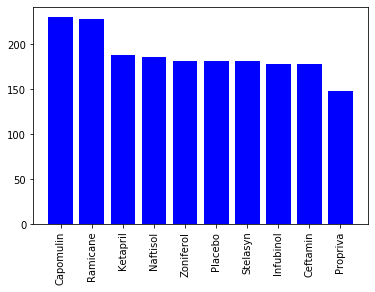

In [86]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(counts))

# # Tell matplotlib that we will be making a bar chart
# # Mouse count is our y axis and x_axis is drug regimen
# # We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(counts.index.values,counts.values, color = "blue", align = "center")
plt.xticks(rotation = "vertical")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B609C5A88>],
      dtype=object)

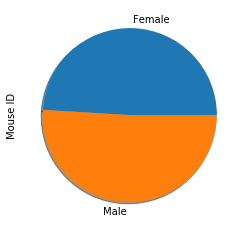

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_male_group = clean_df.groupby(["Sex"])["Mouse ID"].count()
female_male_group.plot(kind = "pie",subplots = True, shadow = True, legend = False)


([<matplotlib.patches.Wedge at 0x23b60884d88>,
 [Text(0.03308201408261561, 1.0995024239828841, ''),
  Text(-0.0330820140826155, -1.0995024239828841, '')])

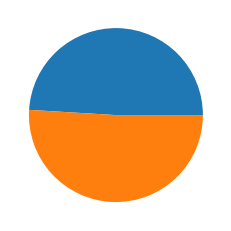

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(female_male_group)

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#pandas day 2, activity 1
drug_reg_filtered = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") | 
                                    (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse
drug_reg_filtered = drug_reg_filtered.sort_values("Timepoint", ascending = False)

#keep only the greatest timepoint for each mouse
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Received askBCS assistance and no need to merge with approach below
drug_reg_filtered = drug_reg_filtered.drop_duplicates(subset=("Mouse ID", "Drug Regimen"), keep = "first")
drug_reg_filtered

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.75,3
800,e476,Infubinol,Male,23,26,45,62.44,1
154,c758,Ramicane,Male,9,17,45,33.40,1
440,i557,Capomulin,Female,1,24,45,47.69,1
144,m957,Capomulin,Female,3,19,45,33.33,1
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.01,1
1743,x226,Ceftamin,Male,23,28,0,45.00,0
594,b447,Ceftamin,Male,2,30,0,45.00,0
1551,t573,Ceftamin,Female,15,27,0,45.00,0


In [90]:
# potential alternate approach - create summary statistics for plotting
drug_reg_grouped = drug_reg_filtered.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["sum","mean","median","var","std","sem"]})
drug_reg_grouped

Tumor Volume (mm3)                             
                            sum  mean median   var  std  sem
Drug Regimen                                                
Capomulin                916.69 36.67  38.13 32.66 5.72 1.14
Ceftamin                1443.85 57.75  59.85 69.98 8.37 1.67
Infubinol               1454.46 58.18  60.17 74.01 8.60 1.72
Ramicane                 904.78 36.19  36.56 32.17 5.67 1.13

In [91]:
# # Put treatments into a list for for loop (and later for plot labels)
# # failed attempt
# treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# # Create empty list to fill with tumor vol data (for plotting)
# tumor_vol_list = []

# #create for loop to capture data
# tumor_vol_drug = 0
# for row in drug_reg_filtered:
#     if row[3] == "Capomulin" then
#     tumor_vol_drug = tumor_vol_drug + tumor_vol_drug
        

In [94]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Matplotlib day 3, activity 2
quartiles = drug_reg_filtered["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

In [115]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
cap_tumor_vol = drug_reg_filtered.loc[(drug_reg_filtered["Drug Regimen"] == "Capomulin")]
cef_tumor_vol = drug_reg_filtered.loc[(drug_reg_filtered["Drug Regimen"] == "Ceftamin")]
inf_tumor_vol = drug_reg_filtered.loc[(drug_reg_filtered["Drug Regimen"] == "Infubinol")]
ram_tumor_vol = drug_reg_filtered.loc[(drug_reg_filtered["Drug Regimen"] == "Ramicane")]

In [116]:
# Determine outliers using upper and lower bounds
cap_outliers_df = cap_tumor_vol.loc[(cap_tumor_vol["Tumor Volume (mm3)"] > upper_bound) | (cap_tumor_vol["Tumor Volume (mm3)"] < lower_bound)]
cap_outliers_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [117]:
cef_outliers_df = cef_tumor_vol.loc[(cef_tumor_vol["Tumor Volume (mm3)"] > upper_bound) | (cef_tumor_vol["Tumor Volume (mm3)"] < lower_bound)]
cef_outliers_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [103]:
inf_outliers_df = inf_tumor_vol.loc[(inf_tumor_vol["Tumor Volume (mm3)"] > upper_bound) | (inf_tumor_vol["Tumor Volume (mm3)"] < lower_bound)]
inf_outliers_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [104]:
ram_outliers_df = ram_tumor_vol.loc[(ram_tumor_vol["Tumor Volume (mm3)"] > upper_bound) | (ram_tumor_vol["Tumor Volume (mm3)"] < lower_bound)]
ram_outliers_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


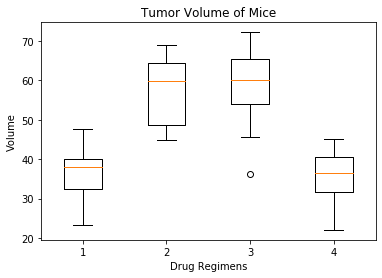

In [127]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# I am not confident in this box plot, and I cannot figure out how to label the series
data = [cap_tumor_vol["Tumor Volume (mm3)"],cef_tumor_vol["Tumor Volume (mm3)"],inf_tumor_vol["Tumor Volume (mm3)"],ram_tumor_vol["Tumor Volume (mm3)"]]
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume of Mice")
ax1.set_ylabel("Volume")
ax1.set_xlabel("Drug Regimens")
ax1.boxplot(data)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

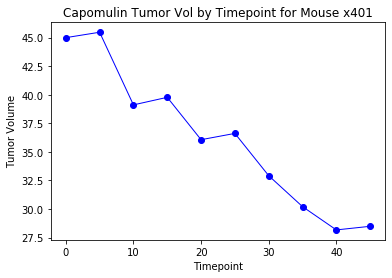

In [128]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Matplotlib Day 1, Activity 3
cap_df = combined_df.loc[(combined_df["Drug Regimen"] == "Capomulin"),:]

#select mouse
cap_mouse = cap_df.loc[(cap_df["Mouse ID"] == "x401"),:]
cap_timepoint = cap_mouse["Timepoint"]
cap_tumor_vol_mouse = cap_mouse["Tumor Volume (mm3)"]

#generate line plot
plt.plot(cap_timepoint, cap_tumor_vol_mouse, marker = "o", color = "blue", linewidth=1)
plt.title("Capomulin Tumor Vol by Timepoint for Mouse x401")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

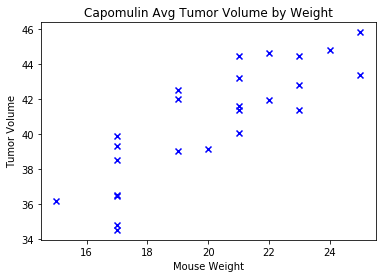

In [129]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#get weight
cap_weight = cap_df.groupby(cap_df["Mouse ID"])["Weight (g)"].mean()
#get average tumor volume
cap_tumor_vol_avg = cap_df.groupby(cap_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

#Matplotlib Day 2, Activity 1
#generate scatter plot
plt.scatter(cap_weight, cap_tumor_vol_avg, marker = "x", color = "blue")
plt.title("Capomulin Avg Tumor Volume by Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show

## Correlation and Regression

In [130]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Matplotlib Day 3, Activity 6
correlation = st.pearsonr(cap_weight, cap_tumor_vol_avg)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}.")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84.


<function matplotlib.pyplot.show(*args, **kw)>

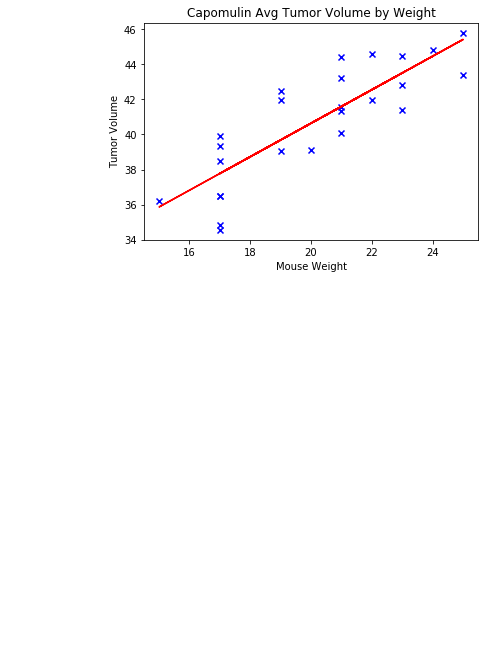

In [131]:
#linear regression model
#Matplotlib Day 3, Activity 8
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_weight, cap_tumor_vol_avg)
regress_values = cap_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_weight, cap_tumor_vol_avg, marker = "x", color = "blue")
plt.plot(cap_weight, regress_values, "r-")
plt.annotate(line_eq,(10,10), fontsize=15, color="blue")
plt.title("Capomulin Avg Tumor Volume by Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show